<a href="https://colab.research.google.com/github/reyansh47/LSTM-based-Predicitve-Mantainance-Model/blob/main/PREDICTIVE_MANTAIANCE_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
import zipfile
import os

# Replace with your zip filename
zip_path = "archive.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("predictive_maintenance")  # Unzips contents to folder named "predictive_maintenance"

In [ ]:
os.listdir("predictive_maintenance")

['predictive_maintenance.csv']

In [ ]:
import pandas as pd

# Replace with actual CSV file name
df = pd.read_csv("predictive_maintenance/predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use these features for forecasting
features = ['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]', 'Rotational speed [rpm]']
target_label = 'Target'

# Clean and normalize
df = df[features + [target_label]].dropna()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

# Create sequences: X = past 50 steps, y = next step
def create_forecast_sequences(data, label, window=50):
    X, y, labels = [], [], []
    for i in range(len(data) - window - 1):
        X.append(data[i:i+window])
        y.append(data[i+window])  # next value (multi-feature)
        labels.append(label[i+window])
    return np.array(X), np.array(y), np.array(labels)

X_seq, y_forecast, y_label = create_forecast_sequences(scaled_data, df[target_label].values)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_seq.shape[1], X_seq.shape[2])),
    Dense(X_seq.shape[2])  # Predict all features at next step
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train forecasting model
model.fit(X_seq, y_forecast, epochs=10, batch_size=128, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,924 (70.02 KB)

 Trainable params: 17,924 (70.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0831 - val_loss: 0.0084
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0089 - val_loss: 0.0078
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0077 - val_loss: 0.0074
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0078 - val_loss: 0.0074
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0076 - val_loss: 0.0074


In [ ]:
# Predict next step
y_pred = model.predict(X_seq)

# Residual = absolute error across all features
residuals = np.mean(np.abs(y_pred - y_forecast), axis=1).reshape(-1, 1)


311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Add last vector from sequence + residuals as input features
X_rf = np.hstack([X_seq[:, -1, :], residuals])
y_rf = y_label

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1918
           1       0.27      0.04      0.07        72

    accuracy                           0.96      1990
   macro avg       0.62      0.52      0.53      1990
weighted avg       0.94      0.96      0.95      1990



In [ ]:
# Predict next step
y_pred = model.predict(X_seq)

# Residual = absolute error across all features
residuals = np.mean(np.abs(y_pred - y_forecast), axis=1).reshape(-1, 1)


311/311 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Add last vector from sequence + residuals as input features
X_rf = np.hstack([X_seq[:, -1, :], residuals])
y_rf = y_label

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1918
           1       0.27      0.04      0.07        72

    accuracy                           0.96      1990
   macro avg       0.62      0.52      0.53      1990
weighted avg       0.94      0.96      0.95      1990



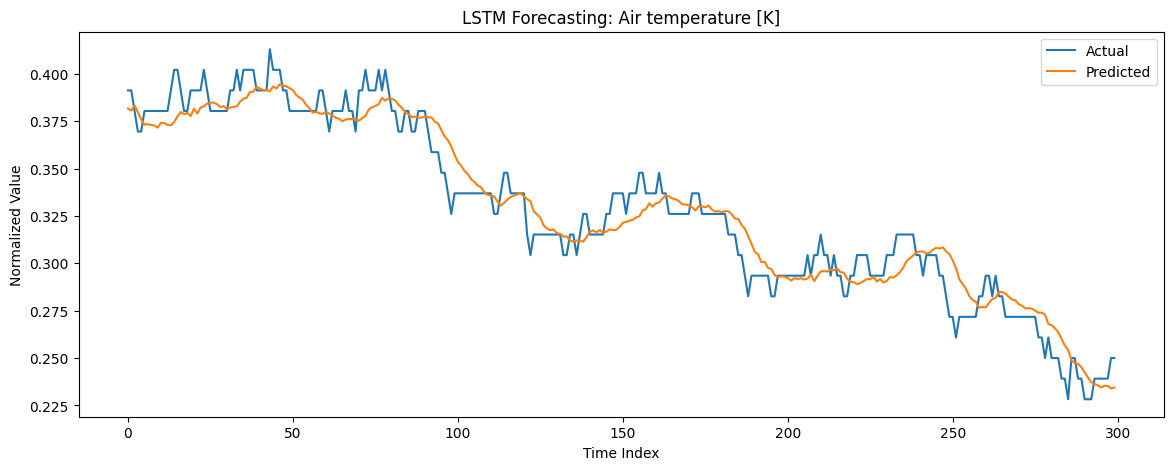

In [ ]:
import matplotlib.pyplot as plt

# Choose feature index to visualize (e.g., 0 = Air Temp)
feature_index = 0
feature_name = features[feature_index]

actual = y_forecast[:, feature_index]
predicted = y_pred[:, feature_index]

plt.figure(figsize=(14, 5))
plt.plot(actual[:300], label='Actual')
plt.plot(predicted[:300], label='Predicted')
plt.title(f'LSTM Forecasting: {feature_name}')
plt.xlabel('Time Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()


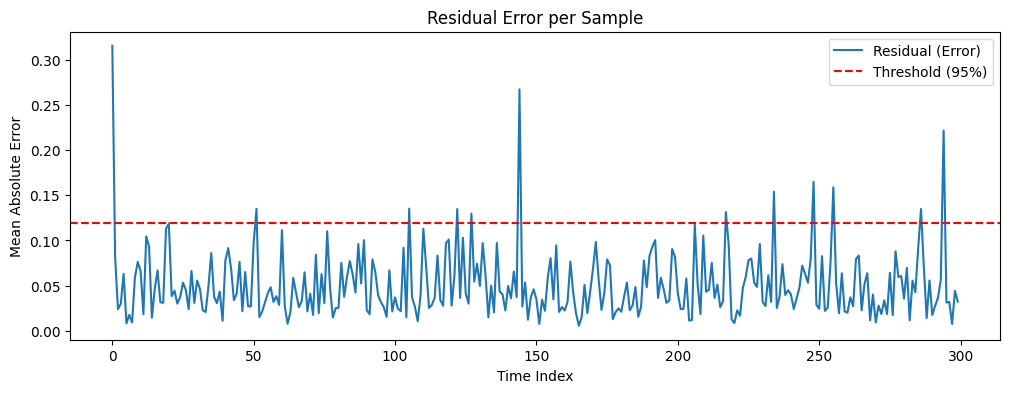

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(residuals[:300], label='Residual (Error)')
plt.axhline(np.percentile(residuals, 95), color='red', linestyle='--', label='Threshold (95%)')
plt.title("Residual Error per Sample")
plt.xlabel("Time Index")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()


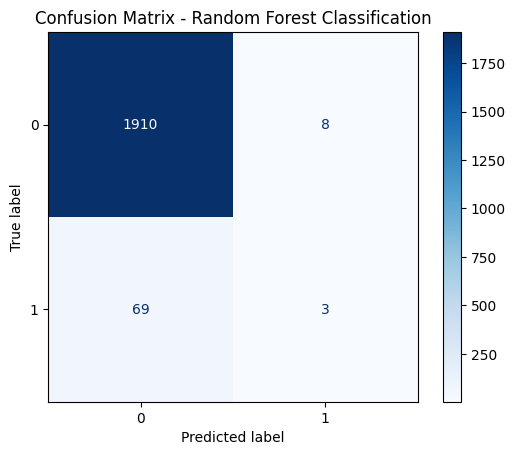

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest Classification")
plt.show()

In [ ]:
# Save model as .keras
model.save("lstm_forecasting_model.keras")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("lstm_forecasting_model.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import joblib
joblib.dump(rf, "random_forest_classifier.pkl")


['random_forest_classifier.pkl']

In [ ]:
rf_loaded = joblib.load("random_forest_classifier.pkl")
